In [1]:
# Import image processing libraries
from scipy import ndimage

import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

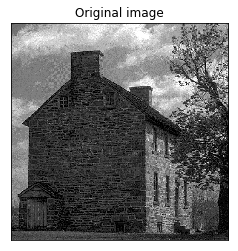

In [2]:
# Load some images (all the examples will use the baboon image)
img = cv2.imread("house.png")
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = img.astype(np.int32)

plt.imshow(img, cmap=plt.cm.gray)
plt.title("Original image"), plt.xticks([]), plt.yticks([])
plt.show()

# 1.1 Filtragem em domínio espacial

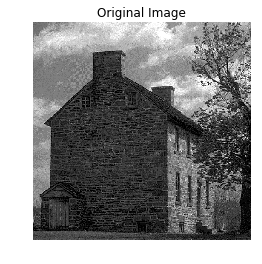

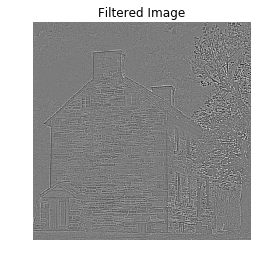

In [3]:
# Exercise 1.1

h1 = np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])
def sum_filter(values):
    return (values * h1.reshape(-1)).sum()

new_image = ndimage.generic_filter(img, sum_filter, footprint=np.ones(h1.shape))

plt.imshow(img, cmap=plt.cm.gray)
plt.title("Original Image"), plt.axis('off')
plt.show()

plt.imshow(new_image, cmap=plt.cm.gray)
plt.title("Filtered Image"), plt.axis('off')
plt.show()

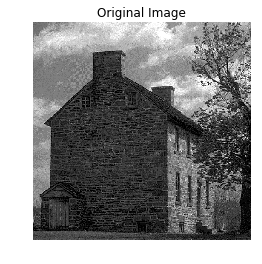

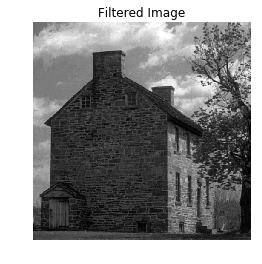

In [4]:
def sum_filter2(values):
    return (values * h2).sum() / 16

h2 = np.array([1,4,6,4,1])

new_image1 = ndimage.generic_filter(img, sum_filter2, footprint=h2.reshape(1,5))
new_image2 = ndimage.generic_filter(img, sum_filter2, footprint=h2.reshape(5,1))
new_image = new_image1 + new_image2

plt.imshow(img, cmap=plt.cm.gray)
plt.title("Original Image"), plt.axis('off')
plt.show()

plt.imshow(new_image, cmap=plt.cm.gray)
plt.title("Filtered Image"), plt.axis('off')
plt.show()


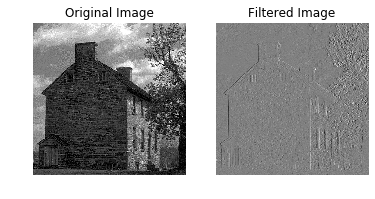

In [5]:
h3 = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0 ,1]])

def sum_filter3(values):
    return (values * h3.reshape(-1)).sum()

new_image1 = ndimage.generic_filter(img, sum_filter3, footprint=np.ones(h3.shape))

plt.subplot(121), plt.imshow(img, cmap=plt.cm.gray)
plt.title("Original Image"), plt.axis('off')

plt.subplot(122), plt.imshow(new_image1, cmap=plt.cm.gray)
plt.title("Filtered Image"), plt.axis('off')
plt.show()

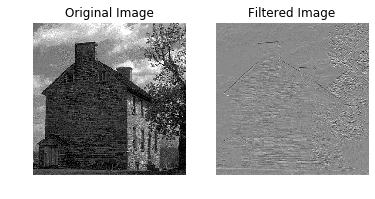

In [6]:
h4 = np.array([[-1, -2, -1],
               [0, 0, 0],
               [1, 2, 1]])

def sum_filter4(values):
    return (values * h4.reshape(-1)).sum()

new_image2 = ndimage.generic_filter(img, sum_filter4, footprint=np.ones(h4.shape))

plt.subplot(121), plt.imshow(img, cmap=plt.cm.gray)
plt.title("Original Image"), plt.axis('off')

plt.subplot(122), plt.imshow(new_image2, cmap=plt.cm.gray)
plt.title("Filtered Image"), plt.axis('off')
plt.show()

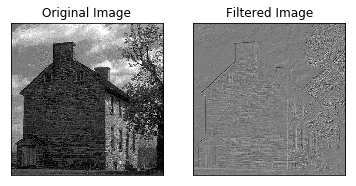

In [7]:
new_image = new_image1 + new_image2

plt.subplot(121), plt.imshow(img, cmap=plt.cm.gray)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(new_image, cmap=plt.cm.gray)
plt.title("Filtered Image"), plt.xticks([]), plt.yticks([])
plt.show()

# Filtragem em dominio de frequencia

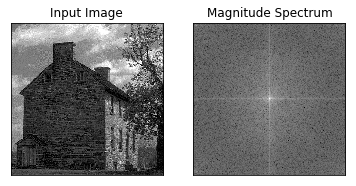

In [8]:
fft_image = np.fft.fft2(img)
shift_image = np.fft.fftshift(fft_image)
magnitude_spectrum = np.log(np.abs(shift_image))


plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

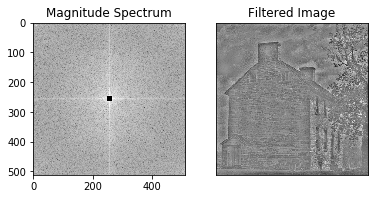

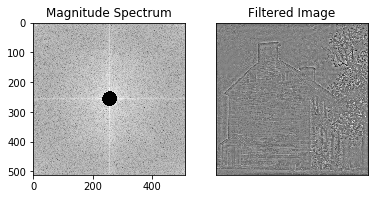

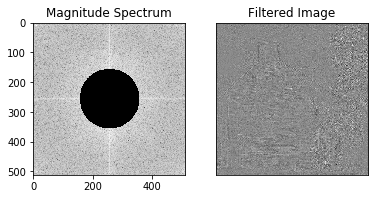

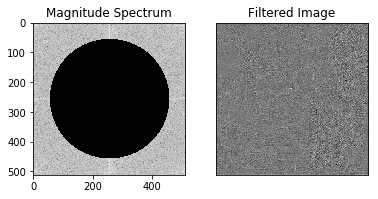

In [9]:
def high_pass_filter(fft_image, cut):
    indices = np.indices(fft_image.shape)
    rows, cols = img.shape
    mid_row, mid_col = rows // 2 + rows % 2, cols // 2 + cols % 2
    
    indices[0] = abs(indices[0] - mid_row)
    indices[1] = abs(indices[1] - mid_col)
    
    mask = np.where(np.sqrt(indices[0] ** 2 + indices[1] ** 2) < cut, 0, 1)
    return fft_image * mask

for i in [10,25,100,200]:
    shift_image = np.fft.fftshift(fft_image)
    shift_image = high_pass_filter(shift_image, i)
    
    magnitude_spectrum = np.log(np.abs(shift_image) + 1)
    
    plt.subplot(121), plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum')

    shift_image = np.fft.ifftshift(shift_image)
    new_image = np.fft.ifft2(shift_image).real
    
    plt.subplot(122), plt.imshow(new_image, cmap = 'gray')
    plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
    plt.show()

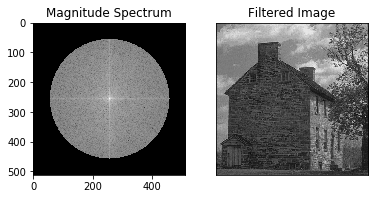

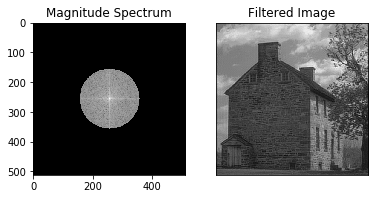

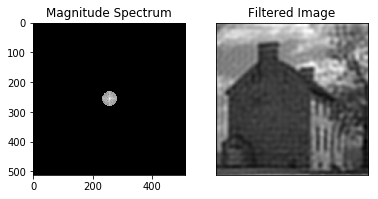

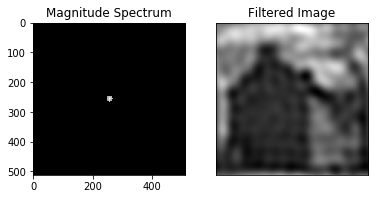

In [10]:
def low_pass_filter(fft_image, cut):
    indices = np.indices(fft_image.shape)
    rows, cols = img.shape
    mid_row, mid_col = rows // 2 + rows % 2, cols // 2 + cols % 2
    indices[0] = abs(indices[0] - mid_row)
    indices[1] = abs(indices[1] - mid_col)
    
    mask = np.where(np.sqrt(indices[0] ** 2 + indices[1] ** 2) > cut, 0, 1)
    return fft_image * mask

for i in [200,100,25,10]:
    shift_image = np.fft.fftshift(fft_image)
    shift_image = low_pass_filter(shift_image, i)
    
    magnitude_spectrum = np.log(np.abs(shift_image) + 1)
    plt.subplot(121), plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum')
    
    shift_image = np.fft.ifftshift(shift_image)
    new_image = np.fft.ifft2(shift_image).real
    
    plt.subplot(122), plt.imshow(new_image, cmap = 'gray')
    plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
    plt.show()

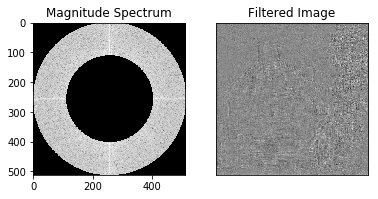

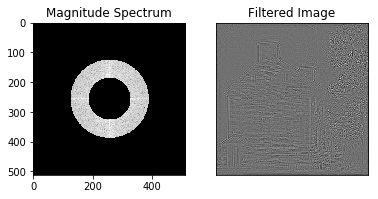

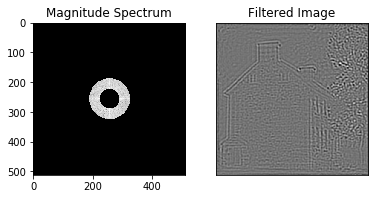

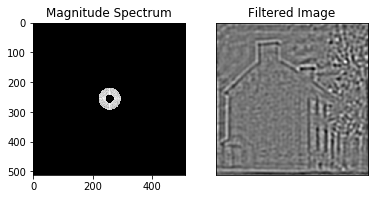

In [11]:
def band_pass_filter(fft_image, cut, width):
    indices = np.indices(fft_image.shape)
    rows, cols = img.shape
    mid_row, mid_col = rows // 2 + rows % 2, cols // 2 + cols % 2
    indices[0] = abs(indices[0] - mid_row)
    indices[1] = abs(indices[1] - mid_col)
    
    distances = np.sqrt(indices[0] ** 2 + indices[1] ** 2).astype(int)
    mask = np.where((distances < cut - width // 2) | (distances > cut + width // 2), 0, 1)
    return fft_image * mask

for i in [200,100,50,25]:
    shift_image = np.fft.fftshift(fft_image)
    shift_image = band_pass_filter(shift_image, i, i // 2 + 10)
    
    magnitude_spectrum = np.log(np.abs(shift_image) + 1)
    plt.subplot(121), plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum')
    
    shift_image = np.fft.ifftshift(shift_image)
    new_image = np.fft.ifft2(shift_image).real
    
    plt.subplot(122), plt.imshow(new_image, cmap = 'gray')
    plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
    plt.show()

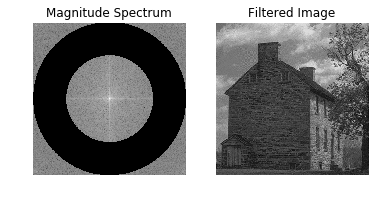

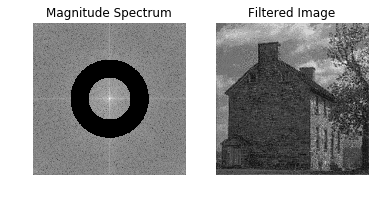

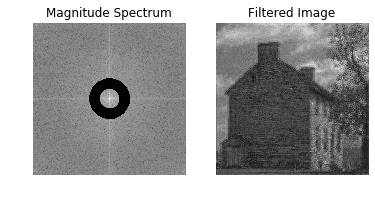

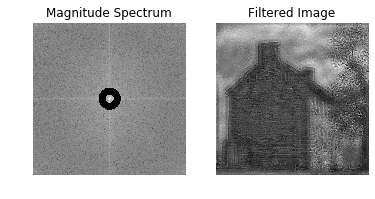

In [12]:
def band_reject_filter(fft_image, cut, width):
    indices = np.indices(fft_image.shape)
    rows, cols = img.shape
    mid_row, mid_col = rows // 2 + rows % 2, cols // 2 + cols % 2
    indices[0] = abs(indices[0] - mid_row)
    indices[1] = abs(indices[1] - mid_col)
    
    distances = np.sqrt(indices[0] ** 2 + indices[1] ** 2).astype(int)
    mask = np.where((distances < cut - width // 2) | (distances > cut + width // 2), 1, 0)
    return fft_image * mask

for i in [200,100,50,25]:
    shift_image = np.fft.fftshift(fft_image)
    shift_image = band_reject_filter(shift_image, i, i // 2 + 10)
    
    magnitude_spectrum = np.log(np.abs(shift_image) + 1)
    plt.subplot(121), plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.axis('off')
    
    shift_image = np.fft.ifftshift(shift_image)
    new_image = np.fft.ifft2(shift_image).real
    
    plt.subplot(122), plt.imshow(new_image, cmap = 'gray')
    plt.title('Filtered Image'), plt.axis('off')
    plt.show()

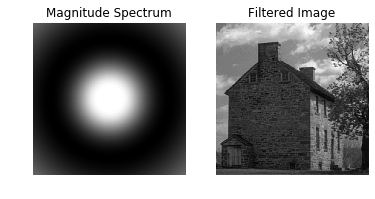

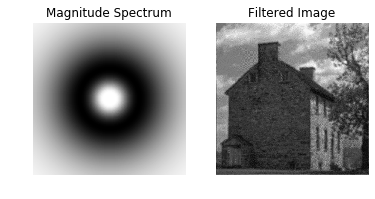

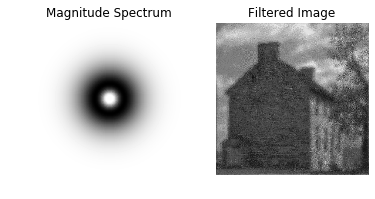

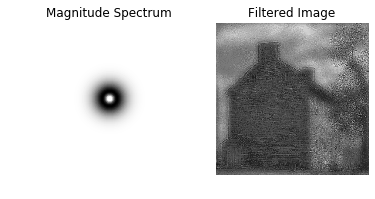

In [13]:
def gaussian_high_pass_mask(shape, cut, width):
    indices = np.indices(shape)
    rows, cols = shape
    mid_row, mid_col = rows // 2 + rows % 2, cols // 2 + cols % 2
    indices[0] = abs(indices[0] - mid_row)
    indices[1] = abs(indices[1] - mid_col)
    
    distances = np.sqrt(indices[0] ** 2 + indices[1] ** 2).astype(int)
    distances = np.where(distances <= 0, 1, distances)
    mask = 1 - np.exp(-(((distances ** 2 - cut ** 2) / (width * distances)) ** 2))
    return mask

for i in [200,100,50,25]:
    shift_image = np.fft.fftshift(fft_image)
    mask = gaussian_high_pass_mask(shift_image.shape, i, i * 2)
    shift_image = shift_image * mask
    
    magnitude_spectrum = np.log(np.abs(mask) + 1)
    plt.subplot(121), plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.axis('off')
    
    shift_image = np.fft.ifftshift(shift_image)
    new_image = np.fft.ifft2(shift_image).real
    
    plt.subplot(122), plt.imshow(new_image, cmap = 'gray')
    plt.title('Filtered Image'), plt.axis('off')
    plt.show()